### Principal Components Analysis (PCA)

PCA is a dimensionality reduction tool that often gives rapid insight into the effective dimensionality of your features. Often we are handed a multiplicity of features, so that our feature space is of dimension $p$ for large $p$. If in the $p$-dimensional space, the data really lie close to a linear subspace, we can often project the $p$ dimensional features in a linear way onto a lower dimensional $k$ dimensional subspace, for $k << p$. 

In the context of general nonlinear methods for projecting high dimensional data onto low-dimensional manifolds, we use nonlinear dimensionality tools like kernel PCA. However, often the linear rank $k$ approximation to your $p$ dimensional data is sufficient, and being a linear method, PCA is quickly computed and easily interpreted. 

Recall from the book that PCA is, more precisely, defined as the eigendecomposition of the covariance matrix of your feature matrix $A$. If the rows of your data matrix are indexed by samples, and the columns by features, the $p \times p$ sample covariance matrix associated with the $n \times p$ feature matrix with $n$ samples (each of dimension $p$), is given by 

$$
\Sigma = \frac{A^T A}{n-1}
$$

Then PCA considers the eigensystem of $\Sigma$. Since $\Sigma$ is symmetric positive definite, it can be decomposed as 

$$
\Sigma = Q\Lambda Q^T
$$

Where $Q$ is a matrix whose columns are the orthogonal set of eigenvectors associated with the eigenvalues on the diagonal of $\Lambda$. Finally, to project the original data into a $k$ dimensional subspace, take the first $k$ columns of $Q$ and place them in a $n \times k$ matrix $W$, and compute 

$$
X = A^TW
$$

$X$ now represents the dimension reduced features. By taking the _first_ $k$ eigenvectors of the covariance matrix, we are taking those associated with the $k$ largest eigenvalues, which corresponds to taking those which explain the maximum amount of variance in the data. Notice that the covariance matrix can only encode _linear_ relationships between the features, which explains why we require more general tools if the data in fact lie close to a low-dimensional manifold that is not linear. 


In [1]:
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
X, y = load_digits(return_X_y=True)

Here we've loaded the canonical MNIST digit dataset. One of the sample images is shown below 

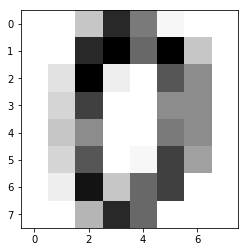

In [7]:
plt.figure() 
plt.imshow(X[0].reshape(8, 8), cmap='Greys')
plt.show() 

The way to interpret PCA here is, even though our images are given as 64-vectors, we believe there are far fewer degrees of freedom in the generative process of writing handwritten digits (informally, most of the digits belonging to any given class will tend to vary only in a few ways). 

We can get a sense for this by plotting the magnitude of the eigenvalues in order from largest to smallest. By seeing how quickly they decay, we can get a sense for the effective dimensionality of the dataset. This kind of plot, when the eigenvalues are normalized to lie between 0 and 1, is called a scree plot. 

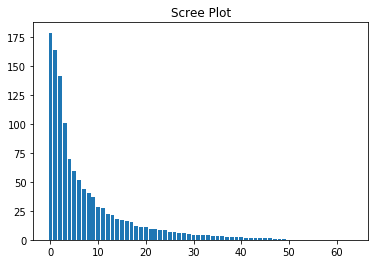

In [41]:
X -= X.mean(axis=0)
cov = (X.T@X)/(X.shape[0]-1)
u, sigma, vt = np.linalg.svd(cov)

plt.figure()
plt.title('Scree Plot')
plt.bar(np.arange(len(sigma)), sigma)
plt.show()

We can see that the magnitude of the eigenvalues drops off quite rapidly. Looking at the plot, we should expect to do quite well if we project our data onto the first 10 or 20 components even, reducing the dimensionality of our data 3-fold. This gives computational savings as well. 

To get a visual, we'll start by projecting just onto the first 2 components, and color the points in the plot by their latent class membership. Even in 2d we can see some structure in the data. 

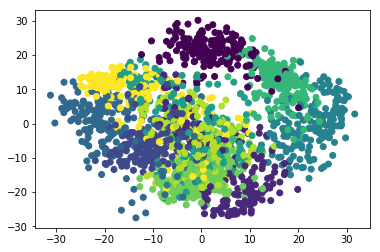

In [43]:
X_pca = X@u[:, :2]

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

We don't need to compute PCA by hand, either. Sklearn provides a module for general dimensionality reduction called `decomposition`. 

In [44]:
from sklearn.decomposition import PCA 

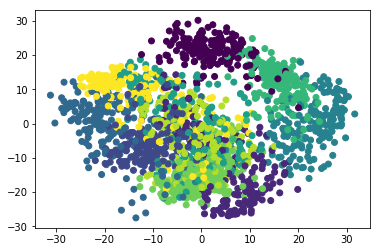

In [45]:
X_pca = PCA(n_components=2).fit_transform(X)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

We can also get a sense for the effect of these projections in terms of predictive performance. Here we'll show how predictive performance scales with the dimension of the subspace we project into. We'll attempt to fit the data with a simple logistic regression, and show the f1-score as our metric. 

In [58]:
from sklearn.linear_model import LogisticRegression as lgr 
from sklearn.metrics import balanced_accuracy_score as bas
from tabulate import tabulate
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
print(tabulate([['Alice', 24], ['Bob', 19]], headers=['Name', 'Age']))

In [68]:
dims = range(1, 65)[::-1]
acc = [] 

for dim in dims: 
    X_pca = PCA(n_components=dim).fit_transform(X)
    clf = lgr(multi_class='auto', solver='lbfgs', max_iter=1000).fit(X_pca, y)
    ba = bas(y, clf.predict(X_pca))
    acc.append(ba) 
    
print(tabulate(zip(dims, acc), headers=['Dimension', 'Balanced Accuracy']))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

  Dimension    Balanced Accuracy
-----------  -------------------
         64             1
         63             1
         62             1
         61             1
         60             1
         59             1
         58             1
         57             1
         56             1
         55             1
         54             1
         53             1
         52             1
         51             1
         50             1
         49             1
         48             1
         47             1
         46             1
         45             1
         44             1
         43             1
         42             1
         41             1
         40             1
         39             1
         38             1
         37             1
         36             1
         35             1
         34             1
         33             1
         32             1
         31             1
         30             1
         29             

In [69]:
print(tabulate(zip(dims, acc), headers=['Dimension', 'Balanced Accuracy']))

  Dimension    Balanced Accuracy
-----------  -------------------
         64             1
         63             1
         62             1
         61             1
         60             1
         59             1
         58             1
         57             1
         56             1
         55             1
         54             1
         53             1
         52             1
         51             1
         50             1
         49             1
         48             1
         47             1
         46             1
         45             1
         44             1
         43             1
         42             1
         41             1
         40             1
         39             1
         38             1
         37             1
         36             1
         35             1
         34             1
         33             1
         32             1
         31             1
         30             1
         29             

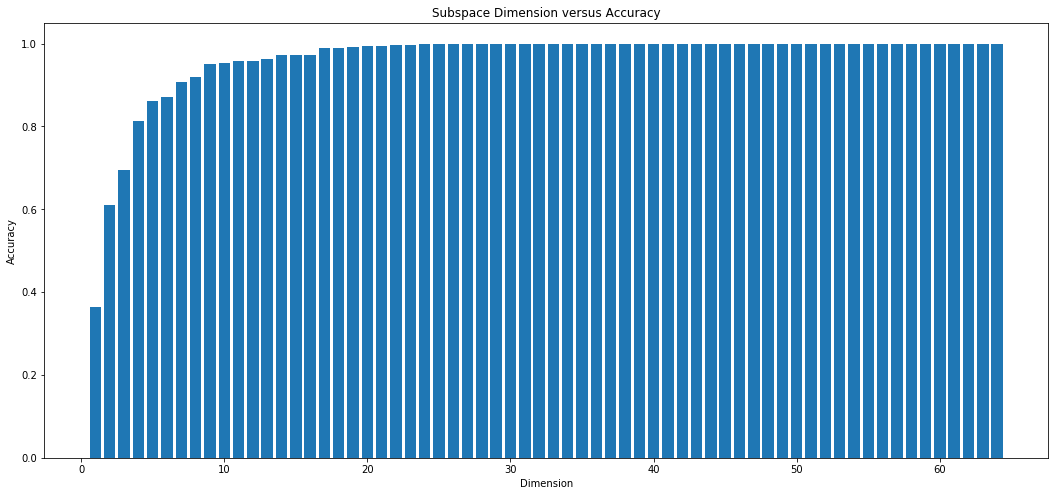

In [73]:
plt.figure(figsize=(18, 8))
plt.title('Subspace Dimension versus Accuracy')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.bar(dims, acc)
plt.show() 

Note that classification accuracy does not improve past 27 dimensions, so using more than 27 dimensions would simply be wasting compute.